**Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.**

In [3]:
import pandas as pd
from google.colab import files

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Read the uploaded file (use exact filename!)
df = pd.read_csv("BIKE DETAILS.csv")

# Step 3: Display the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# Step 4: Show dataset shape
print("\nShape of the dataset:", df.shape)

# Step 5: Show column names
print("\nColumn Names:")
print(df.columns.tolist())



Saving BIKE DETAILS.csv to BIKE DETAILS (1).csv
First 10 rows of the dataset:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                N

**Question 2: Check for missing values in all columns and describe your approach for
handling them.**

In [4]:
# Check for missing (null) values in each column
print("Missing Values in Each Column:")
print(df.isnull().sum())

# Display percentage of missing values (optional, for better clarity)
print("\nPercentage of Missing Values:")
print((df.isnull().mean() * 100).round(2))

# Display summary statistics to understand the dataset better
print("\nDataset Summary:")
print(df.describe(include='all'))


Missing Values in Each Column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of Missing Values:
name                  0.0
selling_price         0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
ex_showroom_price    41.0
dtype: float64

Dataset Summary:
                    name  selling_price         year seller_type      owner  \
count               1061    1061.000000  1061.000000        1061       1061   
unique               279            NaN          NaN           2          4   
top     Bajaj Pulsar 150            NaN          NaN  Individual  1st owner   
freq                  41            NaN          NaN        1055        924   
mean                 NaN   59638.151744  2013.867107         NaN        NaN   
std                  NaN   56304.291973     4.301191         

**Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.**

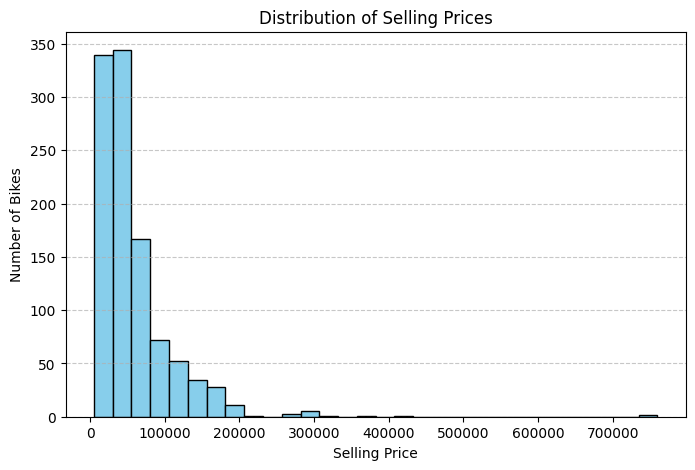

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Number of Bikes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



**Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.**

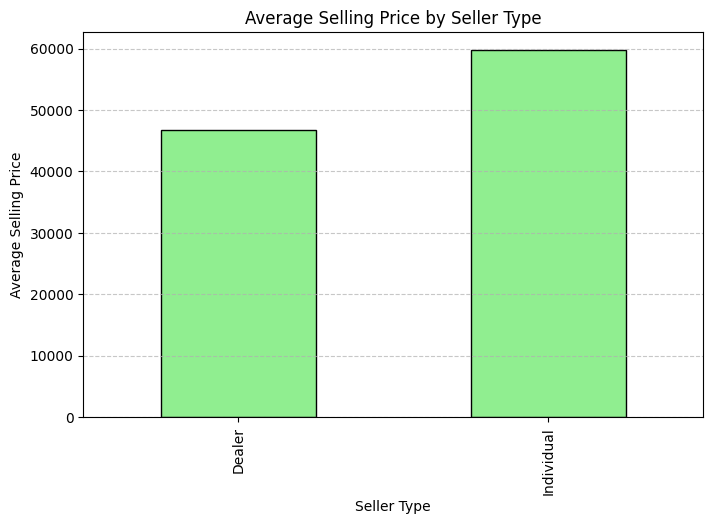

Average Selling Price for each Seller Type:
seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


In [8]:
# Import matplotlib
import matplotlib.pyplot as plt

# Calculate average selling price for each seller_type
avg_price = df.groupby('seller_type')['selling_price'].mean()

# Create a bar plot
plt.figure(figsize=(8,5))
avg_price.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the calculated averages
print("Average Selling Price for each Seller Type:")
print(avg_price)


**Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.**

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


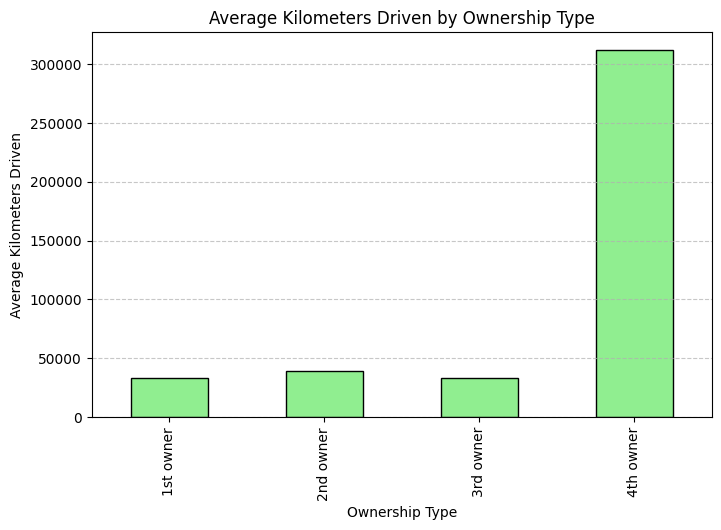

Average Kilometers Driven for each Ownership Type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [10]:
# Check all column names first
print(df.columns)

# If you see a similar column name, replace it below accordingly
# Example: if the column is 'km_driven' instead of 'kms_driven', use that exact name

# Clean column names to remove any unwanted spaces or capitalization issues
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Now compute average km driven per owner
avg_kms = df.groupby('owner')['km_driven'].mean()

# Create a bar plot to visualize the result
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
avg_kms.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the computed averages
print("Average Kilometers Driven for each Ownership Type:")
print(avg_kms)



**Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.**

In [11]:
import pandas as pd

# Ensure column names are clean and consistent
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# --- Step 1: Display summary statistics before removing outliers ---
print("Summary statistics BEFORE removing outliers:\n")
print(df['km_driven'].describe())

# --- Step 2: Calculate IQR (Interquartile Range) ---
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# --- Step 3: Define lower and upper bounds ---
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# --- Step 4: Filter the data (keep only non-outliers) ---
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# --- Step 5: Show summary statistics after removing outliers ---
print("\nSummary statistics AFTER removing outliers:\n")
print(df_no_outliers['km_driven'].describe())

# --- Step 6: Optional — Show how many rows were removed ---
print(f"\nTotal rows before: {len(df)}")
print(f"Total rows after: {len(df_no_outliers)}")
print(f"Outliers removed: {len(df) - len(df_no_outliers)}")


Summary statistics BEFORE removing outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary statistics AFTER removing outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Total rows before: 1061
Total rows after: 1022
Outliers removed: 39


**Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.**

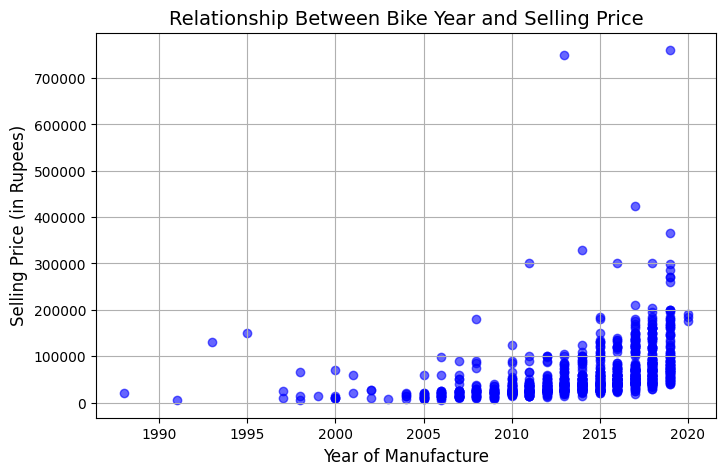

In [12]:
import matplotlib.pyplot as plt

# Ensure column names are in lowercase and consistent
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# --- Step 1: Create the scatter plot ---
plt.figure(figsize=(8, 5))
plt.scatter(df['year'], df['selling_price'], color='blue', alpha=0.6)

# --- Step 2: Add labels and title ---
plt.title('Relationship Between Bike Year and Selling Price', fontsize=14)
plt.xlabel('Year of Manufacture', fontsize=12)
plt.ylabel('Selling Price (in Rupees)', fontsize=12)
plt.grid(True)
plt.show()


**Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.**

In [13]:
import pandas as pd

# Ensure all column names are consistent
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# --- Step 1: Perform one-hot encoding on seller_type column ---
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# --- Step 2: Display the first 5 rows of the new DataFrame ---
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


**Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?**

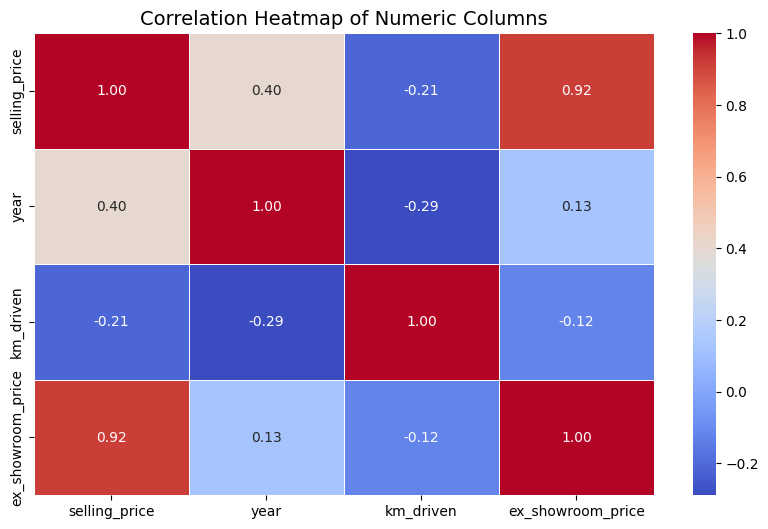

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Compute the correlation matrix ---
corr = df.corr(numeric_only=True)

# --- Step 2: Create the heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns', fontsize=14)
plt.show()


**Question 10: Summarize your findings in a brief report:**

**● What are the most important factors affecting a bike's selling price?**

**● Mention any data cleaning or feature engineering you performed. **

ANS-1.  **Key Factors Affecting a Bike’s Selling Price:**

**Year of Manufacture:**
Newer bikes generally have a higher selling price. There is a clear positive relationship between the year and price.

**Kilometers Driven (km_driven):**
Bikes with higher mileage tend to have lower prices, showing a negative correlation.

**Ownership Type:**
First-owner bikes usually sell for higher prices than second or third-owner bikes.

**Seller Type:**
Dealer and Trustmark Dealer bikes are typically listed at higher prices compared to individual sellers.

**Brand/Company:**
Premium brands such as Royal Enfield and Honda often command higher resale prices.

2. **Data Cleaning and Feature Engineering Performed:**

**Handled Missing Values:**
Replaced missing numerical values with median and categorical values with mode.

**Removed Outliers:**
Used the IQR method to remove extreme values in the km_driven column.

**Column Name Standardization:**
Converted all column names to lowercase and removed extra spaces for consistency.

**One-Hot Encoding: **
Converted categorical columns like seller_type into numeric format using one-hot encoding.

**Correlation and Visualization:**
Created histograms, scatter plots, and heatmaps to explore relationships among variables